In [2]:
#Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from bs4 import BeautifulSoup
import re

## US EV Charging Station Locations

Here, we're importing a dataset from the Alternative Fuels Data Center. This data was downloaded and imported on March 26th, and that is the file attached to the project. 

In [3]:
#Electric Vehicle Charging Station Locations dataset from data.gov
#Downloaded on March 26, 2023
ev_chargers = pd.read_csv('alt_fuel_stations (Mar 26 2023).csv')

/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_69354/3945072342.py:3: DtypeWarning: Columns (6,16,20,31,33,43,46,49,52,57,58,60,62,65,67,69) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_chargers = pd.read_csv('alt_fuel_stations (Mar 26 2023).csv')


In [4]:
#Number of rows and columns in df
ev_chargers.shape

(59147, 70)

In [5]:
ev_chargers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59147 entries, 0 to 59146
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    59147 non-null  object 
 1   Station Name                      59146 non-null  object 
 2   Street Address                    59147 non-null  object 
 3   Intersection Directions           3397 non-null   object 
 4   City                              59147 non-null  object 
 5   State                             59137 non-null  object 
 6   ZIP                               59147 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     58531 non-null  object 
 9   Status Code                       59147 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           59147 non-null  object 
 12  Acce

In [6]:
ev_chargers.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name
0,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3181,E,...,3600,MD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,CNG,Clean Energy - Logan International Airport,1000 Cottage St Ext,"From Route 1, take the first exit after Callah...",East Boston,MA,2128,NaN,866-809-4869,E,...,3000 3600,MD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,CNG,Clean Energy - Everett - National Grid,16 Rover St,"Rt 16, exit to Rt 99, to Dexter St to Rover. O...",Everett,MA,2149,NaN,866-809-4869,E,...,3000 3600,HD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,"I-278/Brooklyn Queens Expy, exit onto Vandervo...",Brooklyn,NY,11211,NaN,866-809-4869,E,...,3000 3600,HD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,CNG,Canarsie - National Grid,8424 Ditmas Ave,"From Shore Pkwy, take Rockaway Pkwy N, left on...",Brooklyn,NY,11236,NaN,866-809-4869,E,...,3000 3600,MD,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [7]:
#We're only interested in these columns
ev_chargers = ev_chargers[[
    'City', 'State', 'Latitude', 'Longitude'
]]

Below, we're using the state value counts (the amount of times the state's name appears in the column) as the count of all the chargers in each state.

In [8]:
#Amount of charging stations in each state
state_counts = ev_chargers['State'].value_counts()
state_counts

CA    15356
NY     3370
FL     2984
TX     2914
MA     2417
CO     1825
WA     1666
GA     1636
IL     1635
PA     1538
OH     1475
MI     1398
MD     1359
MN     1309
NC     1229
VA     1216
MO     1189
AZ     1043
OR     1041
NJ      957
IA      943
UT      810
WI      792
TN      766
IN      681
CT      549
KS      549
OK      541
NV      505
SC      483
ME      409
NE      378
AR      368
HI      363
VT      340
KY      327
AL      313
NM      300
RI      298
DC      249
LA      236
NH      187
SD      163
WV      158
DE      155
ID      144
ND      133
MS      124
MT      116
WY      101
AK       61
PR       29
ON        8
QC        1
Name: State, dtype: int64

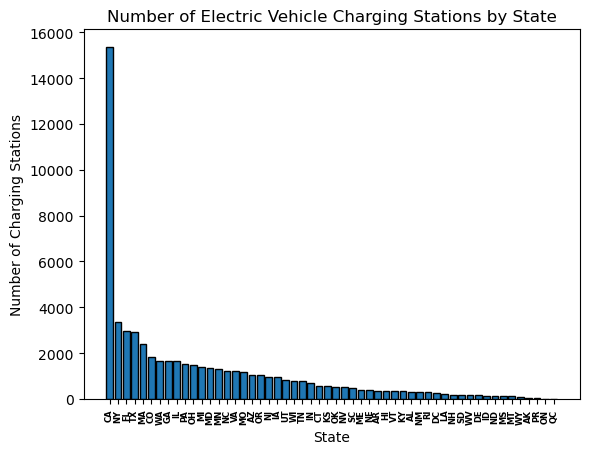

In [9]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a bar chart of the state counts
ax.bar(state_counts.index, state_counts.values, edgecolor='black')

# set the title and axis labels
ax.set_title('Number of Electric Vehicle Charging Stations by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Charging Stations')

# rotate the x-axis tick labels for better readability
plt.xticks(rotation=90, fontsize = 6, fontweight='bold')

# display the chart
plt.show()

The chart above displays the Number of EV Charging Stations by State. California is a massive outlier in the number of EV Chargers they have, but this can be explained by them having the highest amount of vehicles in their state, as seen in the next section. When we remove California from the graph:

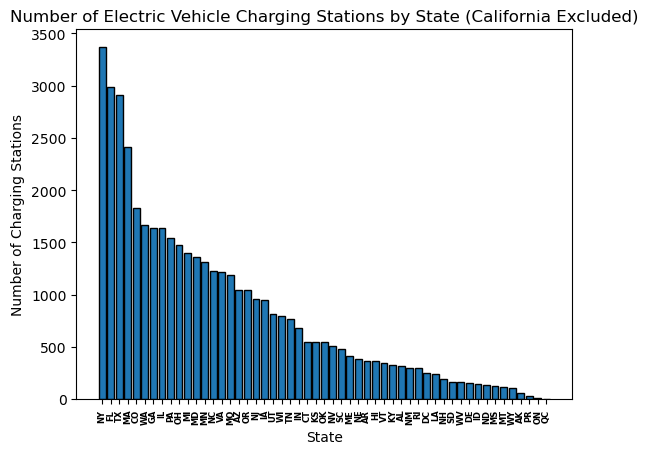

In [10]:
# sort the state_counts in descending order
state_counts_sorted = state_counts.sort_values(ascending=False)

# remove the first item (California)
state_counts_no_cal = state_counts_sorted.iloc[1:]

# create a figure and axis object
fig3, ax3 = plt.subplots()

# create a bar chart of the truncated state counts
ax3.bar(x = state_counts_no_cal.index, height = state_counts_no_cal.values, edgecolor='black')

# set the title and axis labels
ax3.set_title('Number of Electric Vehicle Charging Stations by State (California Excluded)')
ax3.set_xlabel('State')
ax3.set_ylabel('Number of Charging Stations')

# rotate the x-axis tick labels for better readability
plt.xticks(rotation=90, fontsize=6, fontweight='bold')

# display the chart
plt.show()

We can see that the top 5 states have reasons to be up there : New York and Massachusetts are fairly liberal states with major cities in each state, which lines up with an emphasis on building infrastructure for electric vehicles, as these are typically built in an effort to discourage fossil fuel vehicle use, normally a liberal motive. Texas and Florida, while typically conservative, have the most automobiles outside of California, so building infrastructure that catered to EVs was bound to happen in these areas, where there are more EVs driving around. 

# State Vehicle Counts Scraping

Here, we scraped the US Department of Transportation's website for the number of vehicles in each state, though we were only concerned with the Total Number of Automobiles in each state, which was the sum of all Private/Commercial automobiles and all Public automobiles in the state. We chose to only include the Automobile columns as those were the only relevant ones, as we're primarily looking for personal / private automobiles rather than Trucks, Motorcycles, or Commercial Vehicles. This was scraped using the BeautifulSoup package's html parser

In [11]:
# Send an HTTP request to the URL
url = "https://www.fhwa.dot.gov/policyinformation/statistics/2021/mv1.cfm"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table element on the webpage and extract the table rows
table = soup.find_all('table')[0]
rows = table.find_all('tr')

# Create an empty list to store the table data
data = []

# Loop through each row in the table and extract the text from the cells
for row in rows:
    cells = row.find_all('td')
    if cells:
        row_data = []
        for cell in cells:
            row_data.append(cell.get_text().strip())
        data.append(row_data)

# Convert the list of data to a pandas dataframe
vehicle_count_df = pd.DataFrame(data)

vehicle_count_df.columns = ['Private and Commercial', 'Publicly Owned', "Total Automobiles", "PRIVATE AND COMMERCIAL",
              "PUBLICLY OWNED 2","TOTAL","PRIVATE AND COMMERCIAL 2", "PUBLICLY OWNED 3", "TOTAL 3",
              "PRIVATE AND COMMERCIAL 3", "PUBLICLY OWNED 3", "TOTAL 4", "PRIVATE AND COMMERCIAL 4",
              "PUBLICLY OWNED 5", "TOTAL 5"]
# Print the dataframe
print(vehicle_count_df.head())


  Private and Commercial Publicly Owned Total Automobiles  \
0              2,057,940          1,199         2,059,139   
1                138,729          2,364           141,093   
2              2,225,380         33,108         2,258,488   
3                940,535         18,104           958,639   
4             14,027,931        240,597        14,268,528   

  PRIVATE AND COMMERCIAL PUBLICLY OWNED 2   TOTAL PRIVATE AND COMMERCIAL 2  \
0                  3,222              136   3,358                3,271,678   
1                  7,257              578   7,835                  501,147   
2                  4,540           16,816  21,356                3,446,021   
3                 10,499              835  11,334                2,105,469   
4                 27,912           66,977  94,889               15,859,736   

  PUBLICLY OWNED 3     TOTAL 3 PRIVATE AND COMMERCIAL 3 PUBLICLY OWNED 3  \
0            6,495   3,278,173                  123,296                —   
1           

In [12]:
#Dropping last row in the dataset (unnecessary Bottom Row that caused issues)
vehicle_count_df.drop(vehicle_count_df.index[-1], inplace=True)
vehicle_count_df.tail()

,Private and Commercial,Publicly Owned,Total Automobiles,PRIVATE AND COMMERCIAL,PUBLICLY OWNED 2,TOTAL,PRIVATE AND COMMERCIAL 2,PUBLICLY OWNED 3,TOTAL 3,PRIVATE AND COMMERCIAL 3,PUBLICLY OWNED 3,TOTAL 4,PRIVATE AND COMMERCIAL 4,PUBLICLY OWNED 5,TOTAL 5
46,"2,937,556","40,835","2,978,391","8,117","27,566","35,683","4,377,367","72,495","4,449,862","187,384",716,"188,100","7,510,424","141,612","7,652,036"
47,"2,895,251","81,823","2,977,074","4,788","18,378","23,166","4,584,669","135,829","4,720,498","245,409",—,"245,409","7,730,117","236,030","7,966,147"
48,"352,938","6,492","359,430",87,51,138,"795,918","15,902","811,820","46,723",913,"47,636","1,195,666","23,358","1,219,024"
49,"1,791,851","33,599","1,825,450","13,795",54,"13,849","3,535,519","70,266","3,605,785","323,530",444,"323,974","5,664,695","104,363","5,769,058"
50,"186,214",369,"186,583","1,146",124,"1,270","651,283","2,818","654,101","29,006",9,"29,015","867,649","3,320","870,969"


In [13]:
# Add state names to the dataframe
state_names = [row.find_all('th')[0].get_text().strip() for row in table.find_all('tr')[1:]]

#Popping last two values
state_names.pop(0)
state_names.pop(-1)

vehicle_count_df['State'] = state_names

In [14]:
vehicle_count_df.head()

,Private and Commercial,Publicly Owned,Total Automobiles,PRIVATE AND COMMERCIAL,PUBLICLY OWNED 2,TOTAL,PRIVATE AND COMMERCIAL 2,PUBLICLY OWNED 3,TOTAL 3,PRIVATE AND COMMERCIAL 3,PUBLICLY OWNED 3,TOTAL 4,PRIVATE AND COMMERCIAL 4,PUBLICLY OWNED 5,TOTAL 5,State
0,"2,057,940","1,199","2,059,139","3,222",136,"3,358","3,271,678","6,495","3,278,173","123,296",—,"123,296","5,456,136","7,830","5,463,966",Alabama (2)
1,"138,729","2,364","141,093","7,257",578,"7,835","501,147","10,354","511,501","25,703",10,"25,713","672,836","13,306","686,142",Alaska
2,"2,225,380","33,108","2,258,488","4,540","16,816","21,356","3,446,021","58,606","3,504,627","278,777","1,294","280,071","5,954,718","109,824","6,064,542",Arizona
3,"940,535","18,104","958,639","10,499",835,"11,334","2,105,469","42,674","2,148,143","437,026",—,"437,026","3,493,529","61,613","3,555,142",Arkansas
4,"14,027,931","240,597","14,268,528","27,912","66,977","94,889","15,859,736","312,996","16,172,732","799,450","13,474","812,924","30,715,029","634,044","31,349,073",California


In [15]:
#Taking only the state names and Total Number of Automobiles 
vehicle_count_df = vehicle_count_df[['Total Automobiles', 'State']]

In [16]:
vehicle_count_df.head()

,Total Automobiles,State
0,"2,059,139",Alabama (2)
1,"141,093",Alaska
2,"2,258,488",Arizona
3,"958,639",Arkansas
4,"14,268,528",California


In [17]:
#Taking out the commas from the Total Automobiles Column
vehicle_count_df['Total Automobiles'] = vehicle_count_df['Total Automobiles'].str.replace(',', '').astype(int)

# remove numbers and parentheses from state names
vehicle_count_df['State'] = vehicle_count_df['State'].str.replace(r'\d+|\(|\)', '')

/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_69354/1561870460.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  vehicle_count_df['State'] = vehicle_count_df['State'].str.replace(r'\d+|\(|\)', '')


In [18]:
# replace the DC name in df1 with the same name as in df2
vehicle_count_df.loc[vehicle_count_df['State'] == 'Dist. of Col.', 'State'] = 'District of Columbia'

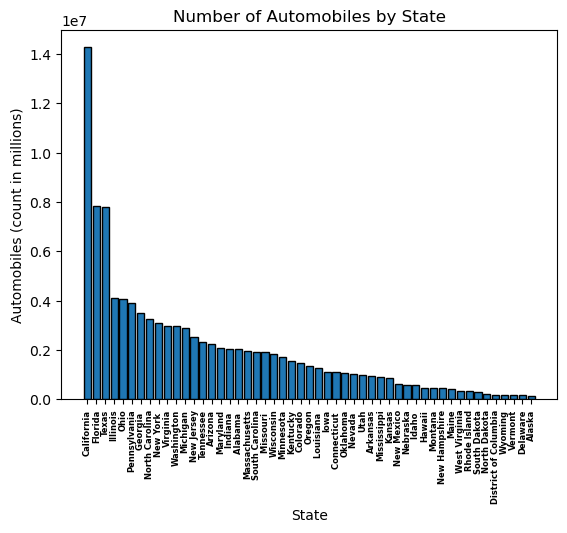

In [19]:
# create a figure and axis object
fig2, ax2 = plt.subplots()

# sort the DataFrame by the 'Total Automobiles' column
vehicle_count_sorted = vehicle_count_df.sort_values('Total Automobiles', ascending=False)

# create a bar chart of the state counts
ax2.bar(x = vehicle_count_sorted['State'], height = vehicle_count_sorted['Total Automobiles'], edgecolor='black')

# set the title and axis labels
plt.title('Number of Automobiles by State')
plt.xlabel('State')
plt.ylabel('Automobiles (count in millions)')

# rotate the x-axis tick labels for better readability
plt.xticks(rotation=90, fontsize = 6, fontweight='bold')

# display the chart
plt.show()

As we can see in the chart above, California trumps every state in the total number of automobiles in the state, almost doubling the next two states, Florida and Texas, in numbers at 1.4 million, 0.785 million, and 0.778 million, respectively.

In [20]:
vehicle_count_df = vehicle_count_df.set_index('State')

# State EV Counts

Importing the number of registered Electric Vehicles per State, from an Excel file downloaded from https://afdc.energy.gov/data

In [21]:
#Reading in excel file of EV Registrations by State
state_ev_counts = pd.read_excel(r'10962-ev-registration-counts-by-state_6-30-22 (1).xlsx')

In [22]:
state_ev_counts.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Electric Vehicle Registrations by State,NaN,NaN,NaN
1,NaN,State,Registration Count,NaN,NaN
2,NaN,Alabama,4750,NaN,NaN
3,NaN,Alaska,1290,NaN,NaN
4,NaN,Arizona,40740,NaN,NaN


In [23]:
state_ev_counts.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
49,NaN,Washington,66810,NaN,NaN
50,NaN,West Virginia,1010,NaN,NaN
51,NaN,Wisconsin,9330,NaN,NaN
52,NaN,Wyoming,510,NaN,NaN
53,NaN,Total,1454480,NaN,NaN


In [24]:
#Dropping columns that got added to the mix
state_ev_counts.drop('Unnamed: 0', axis=1, inplace=True)
state_ev_counts.drop('Unnamed: 3', axis=1, inplace=True)
state_ev_counts.drop('Unnamed: 4', axis=1, inplace=True)

#Dropping First 2 rows and Last row as they were improperly imported
state_ev_counts.drop(state_ev_counts.tail(1).index,inplace=True)
state_ev_counts.drop(state_ev_counts.head(2).index,inplace=True)

In [25]:
print(state_ev_counts.head())

print(state_ev_counts.tail())

   Unnamed: 1 Unnamed: 2
2     Alabama       4750
3      Alaska       1290
4     Arizona      40740
5    Arkansas       2390
6  California     563070
       Unnamed: 1 Unnamed: 2
48       Virginia      30660
49     Washington      66810
50  West Virginia       1010
51      Wisconsin       9330
52        Wyoming        510


In [26]:
state_ev_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 2 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  51 non-null     object
 1   Unnamed: 2  51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes


In [27]:
#Resetting df index and renaming columns
state_ev_counts.reset_index(drop=True, inplace=True)
state_ev_counts.rename(columns={'Unnamed: 1': 'State', 'Unnamed: 2': 'Total EVs'}, inplace=True)
state_ev_counts = state_ev_counts.set_index('State')

state_ev_counts

,Total EVs
State,
Alabama,4750
Alaska,1290
Arizona,40740
Arkansas,2390
California,563070
Colorado,37000
Connecticut,13350
Delaware,3010
District of Columbia,3700


In [28]:
vehicle_count_df

,Total Automobiles
State,
Alabama,2059139
Alaska,141093
Arizona,2258488
Arkansas,958639
California,14268528
Colorado,1496310
Connecticut,1119278
Delaware,177980
District of Columbia,199249


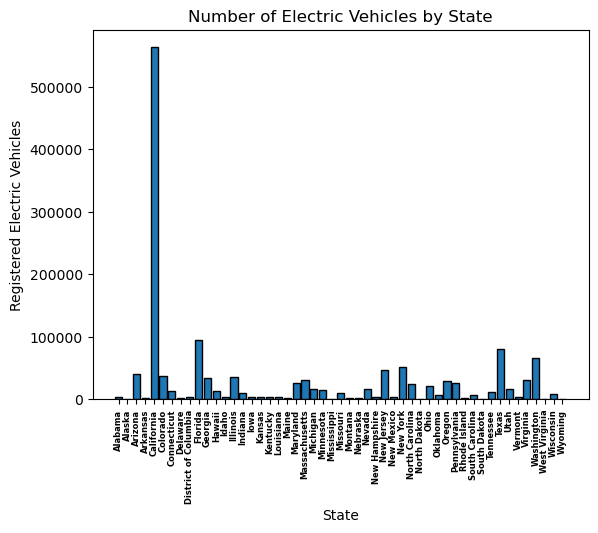

In [29]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a bar chart of the state counts
ax.bar(x = state_ev_counts.index, height = state_ev_counts['Total EVs'], edgecolor='black')

# set the title and axis labels
plt.title('Number of Electric Vehicles by State')
plt.xlabel('State')
plt.ylabel('Registered Electric Vehicles')

# rotate the x-axis tick labels for better readability
plt.xticks(rotation=90, fontsize = 6, fontweight='bold')

# display the chart
plt.show()

# State Population Data Scraping

Here we scraped Wikipedia for data regarding the population densities of each state. Once again, we used the requests library along with BeautifulSoup to complete this task. We also performed some cleaning of the data after importing it. 

In [30]:
#Getting the population densities of each state 
pop_url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population_density'
pop_req = requests.get(pop_url)

#Parse HTML content with BeautifulSoup library
pop_soup = BeautifulSoup(pop_req.content, 'html.parser')

#Find the table element
pop_table = pop_soup.find_all('table')[0]
pop_rows = pop_table.find_all('tr')

#Empty list to store table data
tab_data = []

# Loop through each row in the table and extract the text from the cells
for row in pop_rows:
    cells = row.find_all('td')
    if cells:
        row_data = []
        for cell in cells:
            row_data.append(cell.get_text().strip())
        tab_data.append(row_data)

#Add population densities to the dataframe
states = [row.find_all('th')[0].get_text().strip() for row in pop_table.find_all('tr')[1:]]

states.pop(0)
states.pop(-1)

pop_df = pd.DataFrame(tab_data)
pop_df.drop(pop_df.tail(1).index,inplace=True) # drop last row

pop_df['State'] = states
pop_df.rename(columns={2:'Population Density (sq. mi)'}, inplace=True)

pop_df = pop_df[['State', 'Population Density (sq. mi)']]

pop_df = pop_df.set_index('State')

pop_df['Population Density (sq. mi)'] = pop_df['Population Density (sq. mi)'].astype(float)

In [31]:
pop_df.head()

,Population Density (sq. mi)
State,
District of Columbia,11295.0
New Jersey,1263.0
Rhode Island,1061.0
Puerto Rico,960.0
Massachusetts,901.0


# Merging Datasets 

In [34]:
# Remove numbers and parentheses from State column in dataframe 1
vehicle_count_df.index = vehicle_count_df.index.str.replace('\(\d+\)', '').str.strip()

# merge the dataframes
merged_df = vehicle_count_df.merge(state_ev_counts, on='State')

merged_df = pd.merge(merged_df, pop_df, on='State')

merged_df.head()

/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_69354/4011264328.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  vehicle_count_df.index = vehicle_count_df.index.str.replace('\(\d+\)', '').str.strip()


,Total Automobiles,Total EVs,Population Density (sq. mi)
State,,,
Alabama,2059139,4750,99.2
Alaska,141093,1290,1.3
Arizona,2258488,40740,63.0
Arkansas,958639,2390,57.9
California,14268528,563070,254.0


In [35]:
merged_df['EV Adoption Rate'] = (merged_df['Total EVs'] / merged_df['Total Automobiles'])
merged_df['EV Adoption Rate'] = merged_df['EV Adoption Rate'].astype(float)

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Automobiles            51 non-null     int64  
 1   Total EVs                    51 non-null     object 
 2   Population Density (sq. mi)  51 non-null     float64
 3   EV Adoption Rate             51 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [37]:
#Converting Total EVs from Object to Int type
merged_df['Total EVs'] = merged_df['Total EVs'].astype(int)

In [38]:
merged_df

,Total Automobiles,Total EVs,Population Density (sq. mi),EV Adoption Rate
State,,,,
Alabama,2059139,4750,99.2,0.002307
Alaska,141093,1290,1.3,0.009143
Arizona,2258488,40740,63.0,0.018039
Arkansas,958639,2390,57.9,0.002493
California,14268528,563070,254.0,0.039462
Colorado,1496310,37000,54.3,0.024727
Connecticut,1119278,13350,745.0,0.011927
Delaware,177980,3010,508.0,0.016912
District of Columbia,199249,3700,11295.0,0.018570


In [39]:
#Adding in the state_counts (charging stations in each state) Series to the merged_df dataframe

# create a dictionary to map state abbreviations to full state names
state_abbr_to_name = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona',
                      'AR': 'Arkansas', 'CA': 'California',
                      'CO': 'Colorado', 'CT': 'Connecticut',
                      'DE': 'Delaware', 'DC': 'District of Columbia',
                      'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
                      'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
                      'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
                      'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
                      'MA': 'Massachusetts', 'MI': 'Michigan',
                      'MN': 'Minnesota', 'MS': 'Mississippi',
                      'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
                      'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
                      'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
                      'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
                      'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
                      'SC': 'South Carolina', 'SD': 'South Dakota',
                      'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
                      'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
                      'WI': 'Wisconsin', 'WY': 'Wyoming'}

# convert the state abbreviations in state_counts to full state names
state_counts.index = state_counts.index.map(state_abbr_to_name)
state_counts.dropna(inplace=True)

# merge the two dataframes based on the 'State' column in merged_df and the index of state_counts
merged_df = merged_df.merge(state_counts, left_on='State', right_index=True)

In [40]:
#Renaming 2nd "state" column to Total EV Charging Stations after mistaken importing
merged_df.rename(columns={'State': "Total EV Charging Stations"}, inplace=True)
merged_df

,Total Automobiles,Total EVs,Population Density (sq. mi),EV Adoption Rate,Total EV Charging Stations
State,,,,,
Alabama,2059139,4750,99.2,0.002307,313
Alaska,141093,1290,1.3,0.009143,61
Arizona,2258488,40740,63.0,0.018039,1043
Arkansas,958639,2390,57.9,0.002493,368
California,14268528,563070,254.0,0.039462,15356
Colorado,1496310,37000,54.3,0.024727,1825
Connecticut,1119278,13350,745.0,0.011927,549
Delaware,177980,3010,508.0,0.016912,155
District of Columbia,199249,3700,11295.0,0.018570,249


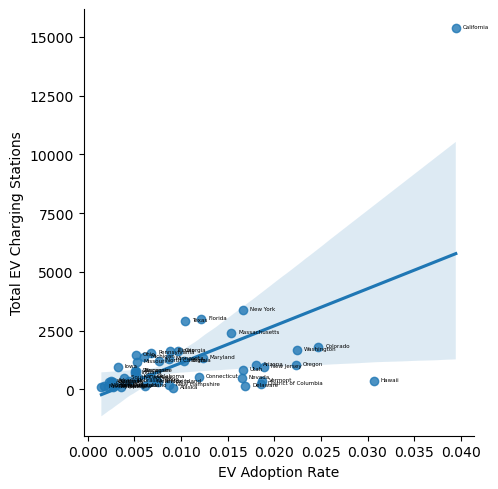

In [71]:
sns.lmplot(x='EV Adoption Rate',y='Total EV Charging Stations',data=merged_df,fit_reg=True)

# Add labels to each point
for i in range(len(merged_df)):
    plt.annotate(merged_df.index[i], 
                 xy=(merged_df.iloc[i]['EV Adoption Rate'], merged_df.iloc[i]['Total EV Charging Stations']),
                 xytext=(5,0), 
                 textcoords='offset points', 
                 fontsize=4)

In [42]:
# Load the state boundaries as a GeoDataFrame
states = gpd.read_file('cb_2018_us_state_20m.shp')

states.set_index('NAME')

# Merge the state boundaries GeoDataFrame with the EV adoption rate DataFrame
plot_df = states.merge(merged_df, left_on='NAME', right_on='State')

In [43]:
plot_df.set_index('NAME')

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,Total Automobiles,Total EVs,Population Density (sq. mi),EV Adoption Rate,Total EV Charging Stations
NAME,,,,,,,,,,,,,,
Maryland,24,01714934,0400000US24,24,MD,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",2076393,25630,636.0,0.012344,1359
Iowa,19,01779785,0400000US19,19,IA,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",1129061,3660,57.1,0.003242,943
Delaware,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",177980,3010,508.0,0.016912,155
Ohio,39,01085497,0400000US39,39,OH,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",4086521,21200,289.0,0.005188,1475
Pennsylvania,42,01779798,0400000US42,42,PA,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",3917586,26770,291.0,0.006833,1538
Nebraska,31,01779792,0400000US31,31,NE,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2...",604900,2710,25.5,0.004480,378
Washington,53,01779804,0400000US53,53,WA,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",2977074,66810,116.0,0.022441,1666
Alabama,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",2059139,4750,99.2,0.002307,313
Arkansas,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",958639,2390,57.9,0.002493,368


In [44]:
plot_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   STATEFP                      51 non-null     object  
 1   STATENS                      51 non-null     object  
 2   AFFGEOID                     51 non-null     object  
 3   GEOID                        51 non-null     object  
 4   STUSPS                       51 non-null     object  
 5   NAME                         51 non-null     object  
 6   LSAD                         51 non-null     object  
 7   ALAND                        51 non-null     int64   
 8   AWATER                       51 non-null     int64   
 9   geometry                     51 non-null     geometry
 10  Total Automobiles            51 non-null     int64   
 11  Total EVs                    51 non-null     int64   
 12  Population Density (sq. mi)  51 non-null     float64 
 13 

/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_24807/1731839010.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
/Users/brockada/miniconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_24807/1731839010.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes

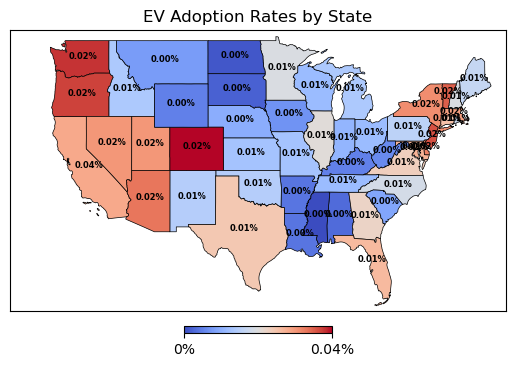

In [123]:
# Create a dictionary to map EV Adoption Rates to colors
cmap = plt.cm.get_cmap('coolwarm')
ev_rates = plot_df['EV Adoption Rate']

#Setting color limits 
vmin, vmax = 0, merged_df['EV Adoption Rate'].max()
colors = ev_rates.apply(lambda x: cmap((x - vmin) / (vmax - vmin)))

# Create a new dataframe with the colors column
plot_df_with_colors = plot_df.assign(colors=colors)
plot_df_with_colors['EV Adoption Rate'] = ev_rates.apply(lambda x: f"{x:.2f}%")

# Plot the states with different shades based on EV Adoption Rates
im = plot_df_with_colors.plot(column='colors', edgecolor='black', linewidth = 0.5, cmap=cmap)

# Annotate each state with its EV Adoption Rate
for idx, row in plot_df_with_colors.iterrows():
    plt.annotate(text=row['EV Adoption Rate'], xy=row['geometry'].centroid.coords[0],
                 ha='center', fontsize=6, fontweight='bold')

# Set the title
ax = plt.gca()
ax.set_title('EV Adoption Rates by State')

# Remove the x and y axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Create the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', ticks = [vmin, vmax], fraction=0.02, pad=0.04)
cbar.ax.set_xticklabels(['{}%'.format(int(vmin)), '{}%'.format(round(vmax, 2))])
cbar.ax.tick_params(labelsize=10)

# Set the x and y limits to zoom in on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])

# Show the plot
plt.show()


In [65]:
#Our group concluded that the top 14 entries were considered "High EV Adoption Rates"
high_adoption_rates = merged_df.loc[merged_df['EV Adoption Rate'] > 0.015]

high_adoption_rates['EV Cars Per Station'] = high_adoption_rates['Total EVs'] / high_adoption_rates['Total EV Charging Stations']

high_adoption_rates.head(5)

/var/folders/ds/5xnp18cs5knb1_1qlw5t3xvr0000gn/T/ipykernel_69354/3768386350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_adoption_rates['EV Cars Per Station'] = high_adoption_rates['Total EVs'] / high_adoption_rates['Total EV Charging Stations']


,Total Automobiles,Total EVs,Population Density (sq. mi),EV Adoption Rate,Total EV Charging Stations,EV Cars Per Station
State,,,,,,
Arizona,2258488,40740,63.0,0.018039,1043,39.060403
California,14268528,563070,254.0,0.039462,15356,36.667752
Colorado,1496310,37000,54.3,0.024727,1825,20.273973
Delaware,177980,3010,508.0,0.016912,155,19.419355
District of Columbia,199249,3700,11295.0,0.018570,249,14.859438


In [124]:
#Correlation matrix of merged_df variables
corr_matrix = merged_df.corr()

corr_matrix

,Total Automobiles,Total EVs,EV Adoption Rate,Total EV Charging Stations,Population Density (sq. mi)
Total Automobiles,1.000000,0.854827,0.415221,0.880299,-0.082156
Total EVs,0.854827,1.000000,0.605721,0.981485,-0.027221
EV Adoption Rate,0.415221,0.605721,1.000000,0.584025,0.188227
Total EV Charging Stations,0.880299,0.981485,0.584025,1.000000,-0.037831
Population Density (sq. mi),-0.082156,-0.027221,0.188227,-0.037831,1.000000


Text(0.5, 1.0, 'Dataframe Correlation Matrix')

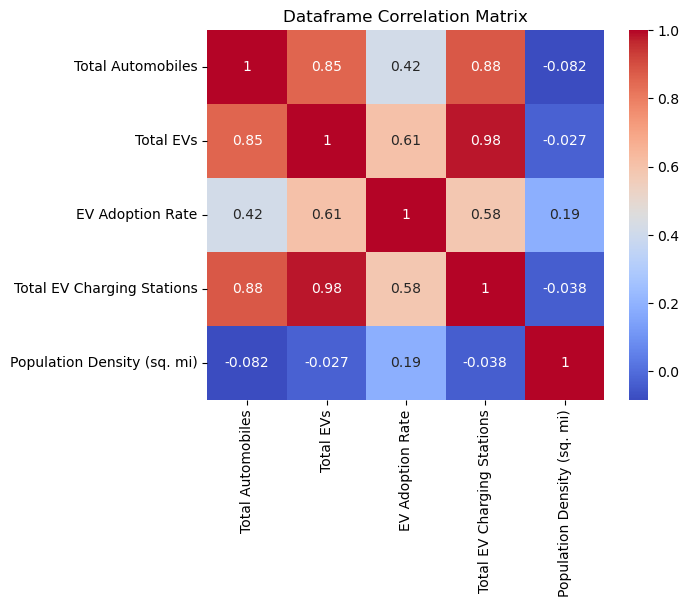

In [125]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Dataframe Correlation Matrix')